# An Introduction to Machine Learning
## Session 1a: Introduction to Machine Learning and Data Exploration

Welcome to Session 1a of our Introduction to Machine Learning course! In this session, we’ll begin by exploring what machine learning is and how it can help us make predictions and uncover insights from data. Machine learning is all about building models that learn from data, helping us answer questions like “What factors impact wine quality?” or “Which characteristics are most common among people who survived the Titanic sinking?”

We’ll be working with the Titanic dataset, which provides information on passengers, including details like age, class, and whether they survived the sinking. Our aim is to explore this data and understand the factors that might influence survival—this process, called Exploratory Data Analysis (EDA), is key to understanding what information is useful in our machine learning models.

By the end of this part of the session, you’ll have a better understanding of what machine learning can do, and you’ll be equipped to start thinking about how to build and evaluate models.

### 1. Importing relevant packages and data.

In [1]:
# Basic imports for data handling and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset
titanic_train = pd.read_csv("../data/titanic_train.csv")

### 2. Exploratory Data Analysis (EDA)

In [3]:
# Display the first few rows
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check dataset structure
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Summary statistics
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It is always important to check for missing data points within a data set -- this is not exclusive to machine learning but all data analysis! Have a go at understanding the missingness below.

In [6]:
# EXERCISE: Check for missing values in each column.
# Hint: Use .isnull().sum() to get the count of missing values.
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

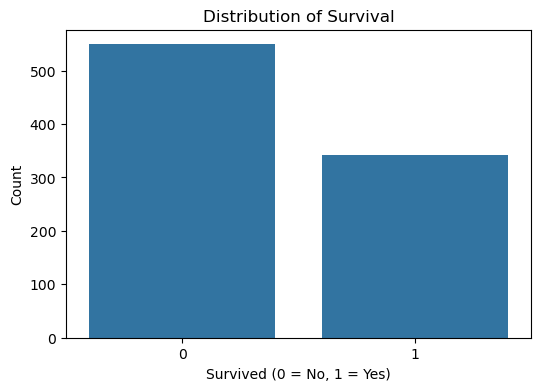

In [7]:
# Survival rate distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_train)
plt.title('Distribution of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

We may be interested on understanding how other factors such as passenger class and sex related to survival. try to visualise each of these.

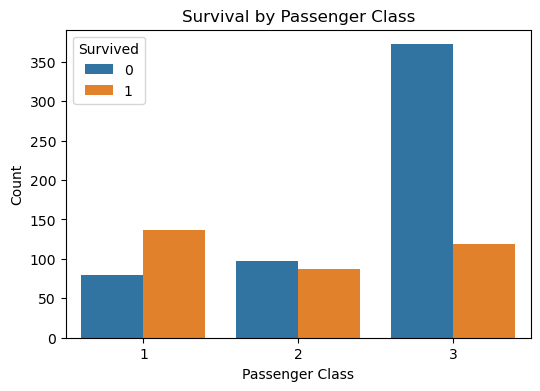

In [10]:
# EXERCISE: Plot survival by passenger class using sns.countplot with hue='Survived'.
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=titanic_train)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

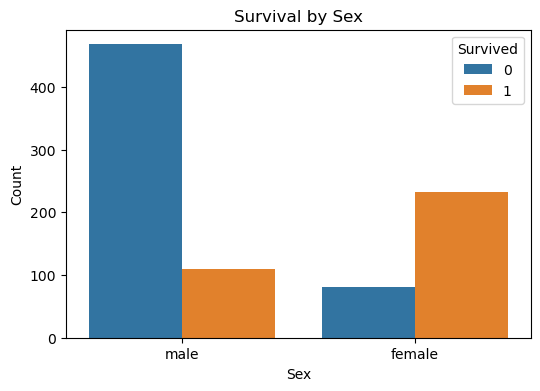

In [11]:
# EXERCISE: Plot survival by sex to see how it affects survival rates.
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=titanic_train)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

Based on these visualisations, we can now start to hypothesise which features seem important for predicting survival.

EXERCISE: In this cell, write down the features you think are important for predicting survival, and explain why you chose each one.

- Sex
- Class
- Embarked